In [17]:
import pandas as pd
import numpy as np

In [8]:
df_train = pd.read_csv('Dataset/10_categories_of_yahoo_answers_for_nlp_tasks_csv/train.csv')
df_test = pd.read_csv('Dataset/10_categories_of_yahoo_answers_for_nlp_tasks_csv/test.csv')

In [22]:
with open('Dataset/10_categories_of_yahoo_answers_for_nlp_tasks_csv/classes.txt', 'r') as file:
    # Read the contents of the file
    category_text = file.read()

category_lines = category_text.strip().split('\n')
category_dict = {}
for line in category_lines:
    key, value = line.split('=')
    category_dict[int(key.strip())] = value.strip()

print(category_dict)

Society & Culture


In [10]:
df_train.class_index.value_counts()

5     140000
6     140000
3     140000
7     140000
2     140000
8     140000
9     140000
10    140000
1     140000
4     139999
Name: class_index, dtype: int64

Equal data points for each class

In [11]:
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.shape

(753655, 4)

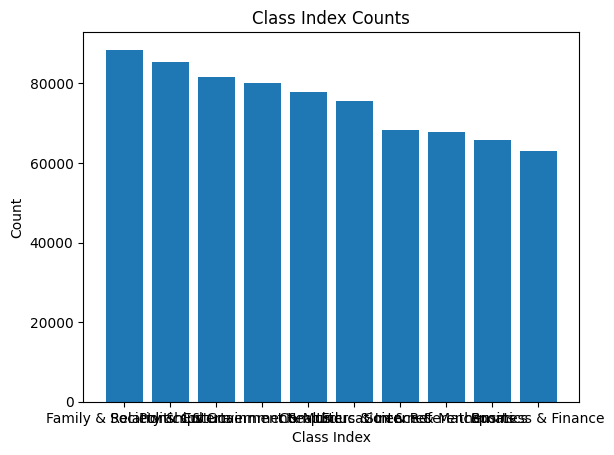

In [23]:
import matplotlib.pyplot as plt
class_counts = df_train.class_index.value_counts()
class_indices = class_counts.index
class_counts = class_counts.values
class_names = [category_dict[i] for i in class_indices]
# Create a bar chart
plt.bar(class_names, class_counts)

# You can add labels and a title for the chart
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.title('Class Index Counts')

# Finally, display the chart
plt.show()

In [25]:
df_train.head()

,class_index,question_title,question_content,best_answer
0,5,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,6,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,3,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,7,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,7,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...


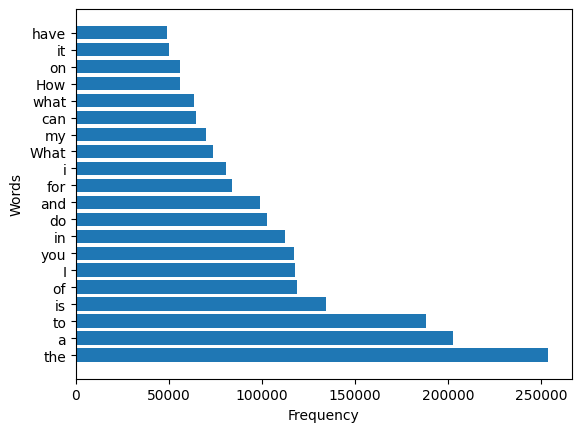

In [26]:
from collections import Counter
word_counts = Counter(" ".join(df_train['question_title']).split())
most_common_words = word_counts.most_common(20)

# Plot the most common words
words, counts = zip(*most_common_words)
plt.barh(words, counts)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

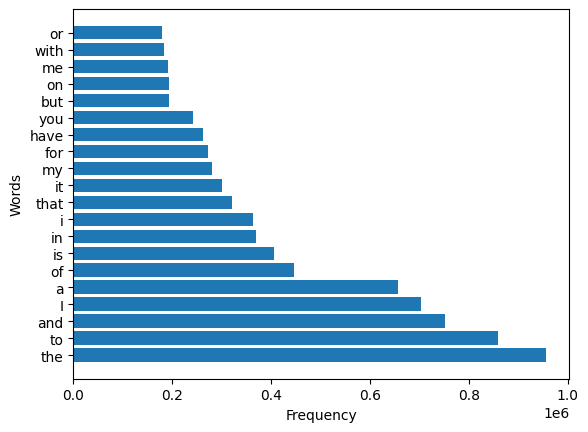

In [29]:
word_counts = Counter(" ".join(df_train['question_content']).split())
most_common_words = word_counts.most_common(20)

# Plot the most common words
words, counts = zip(*most_common_words)
plt.barh(words, counts)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

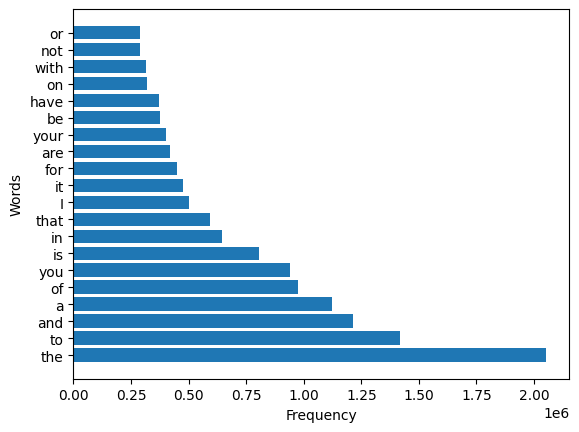

In [28]:
word_counts = Counter(" ".join(df_train['best_answer']).split())
most_common_words = word_counts.most_common(20)

# Plot the most common words
words, counts = zip(*most_common_words)
plt.barh(words, counts)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


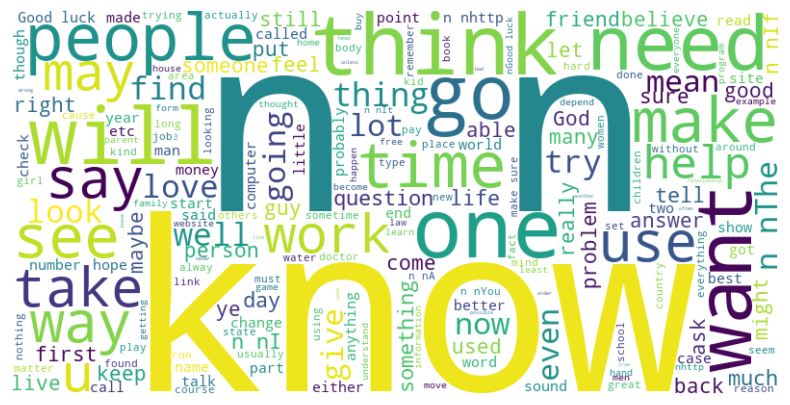

In [30]:
from wordcloud import WordCloud

# Combine all the text into a single string (assuming 'df' is your DataFrame with a 'text' column)
text = ' '.join(df_train['best_answer'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()